In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
print("Train Images : ", train_images.shape)
print("Test Images : ", test_images.shape)

Train Images :  (60000, 28, 28, 1)
Test Images :  (10000, 28, 28, 1)


In [ ]:
train_images = train_images.astype("float32")
train_images /= 255.0

test_images = test_images.astype("float32")
test_images /= 255.0

In [ ]:
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Model

In [ ]:
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1):
      print('\nLoss is low so cancelling training!')
      self.model.stop_training = True

Model 1: One Convolution and Pooling

In [ ]:
model_one = Sequential()

model_one.add(Conv2D(filters=64, kernel_size=3,activation=tf.nn.relu, input_shape=(28, 28, 1)))
model_one.add(MaxPooling2D(pool_size=(2, 2)))

model_one.add(Flatten())
model_one.add(Dense(units=128, activation=tf.nn.relu))
model_one.add(Dense(10, activation=tf.nn.softmax))
model_one.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# First Model
callbacks = CNNCallback()
history_one = model_one.fit(train_images, train_labels,
                            epochs=10,
                            batch_size=32,
                            validation_data=(test_images, test_labels), callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3781 - accuracy: 0.8649 - val_loss: 0.3351 - val_accuracy: 0.8792
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2523 - accuracy: 0.9067 - val_loss: 0.2773 - val_accuracy: 0.8973
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2073 - accuracy: 0.9237 - val_loss: 0.2453 - val_accuracy: 0.9109
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1737 - accuracy: 0.9355 - val_loss: 0.2509 - val_accuracy: 0.9142
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1465 - accuracy: 0.9466 - val_loss: 0.2628 - val_accuracy: 0.9093
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1219 - accuracy: 0.9553 - val_loss: 0.2716 - val_accuracy: 0.9122
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1016 - accuracy: 0.9622 - val_loss: 0.2769 - val_accuracy:

In [ ]:
score_one = model_one.evaluate(test_images, test_labels)
print("Test Loss : ", score_one[0])
print("Test Accuracy : ", score_one[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9143
Test Loss :  0.3018400967121124
Test Accuracy :  0.9143000245094299


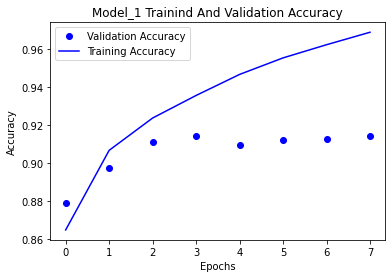

In [ ]:
epochs_one = range(len(history_one.history['accuracy']))
plt.plot(epochs_one, history_one.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_one, history_one.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_1 Trainind And Validation Accuracy")
plt.legend()

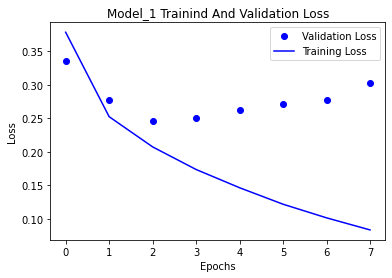

In [ ]:
epochs_one = range(len(history_one.history['accuracy']))
plt.plot(epochs_one, history_one.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_one, history_one.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_1 Trainind And Validation Loss")
plt.legend()

Model 2: Two Convolution and Pooling

In [ ]:
model_two = Sequential()

model_two.add(Conv2D(filters=64, kernel_size=3,activation=tf.nn.relu, input_shape=(28, 28, 1)))
model_two.add(MaxPooling2D(pool_size=(2, 2)))

model_two.add(Conv2D(filters=64, kernel_size=3,activation=tf.nn.relu, input_shape=(28, 28, 1)))
model_two.add(MaxPooling2D(pool_size=(2, 2)))

model_two.add(Flatten())
model_two.add(Dense(units=128, activation=tf.nn.relu))
model_two.add(Dense(10, activation=tf.nn.softmax))
model_two.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# Second Model
callbacks = CNNCallback()
history_two = model_two.fit(train_images, train_labels,
                            epochs=10,
                            batch_size=32,
                            validation_data=(test_images, test_labels), callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4351 - accuracy: 0.8426 - val_loss: 0.3381 - val_accuracy: 0.8786
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2909 - accuracy: 0.8943 - val_loss: 0.2926 - val_accuracy: 0.8933
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9093 - val_loss: 0.2607 - val_accuracy: 0.9056
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2148 - accuracy: 0.9200 - val_loss: 0.2689 - val_accuracy: 0.9032
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1882 - accuracy: 0.9292 - val_loss: 0.2512 - val_accuracy: 0.9093
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1658 - accuracy: 0.9380 - val_loss: 0.2527 - val_accuracy: 0.9114
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1460 - accuracy: 0.9444 - val_loss: 0.2620 - val_accuracy:

In [ ]:
score_two = model_two.evaluate(test_images, test_labels)
print("Test Loss : ", score_one[0])
print("Test Accuracy : ", score_one[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.9088
Test Loss :  0.3018400967121124
Test Accuracy :  0.9143000245094299


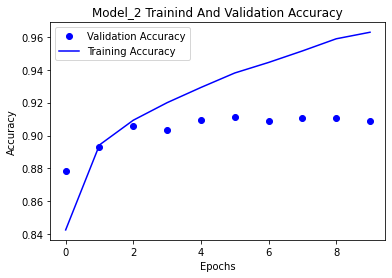

In [ ]:
epochs_two = range(len(history_two.history['accuracy']))
plt.plot(epochs_two, history_two.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_two, history_two.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_2 Trainind And Validation Accuracy")
plt.legend()

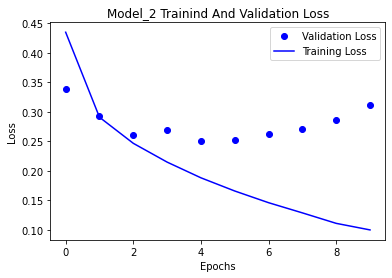

In [ ]:
epochs_two = range(len(history_two.history['accuracy']))
plt.plot(epochs_two, history_two.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_two, history_two.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_2 Trainind And Validation Loss")
plt.legend()

Model 3: Three Convolution and Pooling

In [ ]:
model_three = Sequential()

model_three.add(Conv2D(filters=64, kernel_size=3,activation=tf.nn.relu, input_shape=(28, 28, 1)))
model_three.add(MaxPooling2D(pool_size=(2, 2)))

model_three.add(Conv2D(filters=64, kernel_size=3,activation=tf.nn.relu, input_shape=(28, 28, 1)))
model_three.add(MaxPooling2D(pool_size=(2, 2)))

model_three.add(Conv2D(filters=64, kernel_size=3,activation=tf.nn.relu, input_shape=(28, 28, 1)))
model_three.add(MaxPooling2D(pool_size=(2, 2)))

model_three.add(Flatten())
model_three.add(Dense(units=128, activation=tf.nn.relu))
model_three.add(Dense(10, activation=tf.nn.softmax))
model_three.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# Third Model
callbacks = CNNCallback()
history_three = model_three.fit(train_images, train_labels,
                            epochs=10,
                            batch_size=32,
                            validation_data=(test_images, test_labels), callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5894 - accuracy: 0.7838 - val_loss: 0.4546 - val_accuracy: 0.8321
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3940 - accuracy: 0.8549 - val_loss: 0.3851 - val_accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3332 - accuracy: 0.8769 - val_loss: 0.3487 - val_accuracy: 0.8697
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.8908 - val_loss: 0.3181 - val_accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2684 - accuracy: 0.9010 - val_loss: 0.3205 - val_accuracy: 0.8843
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2493 - accuracy: 0.9069 - val_loss: 0.3054 - val_accuracy: 0.8909
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2317 - accuracy: 0.9147 - val_loss: 0.3156 - val_accuracy:

In [ ]:
score_three = model_three.evaluate(test_images, test_labels)
print("Test Loss : ", score_three[0])
print("Test Accuracy : ", score_three[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8886
Test Loss :  0.34956327080726624
Test Accuracy :  0.8885999917984009


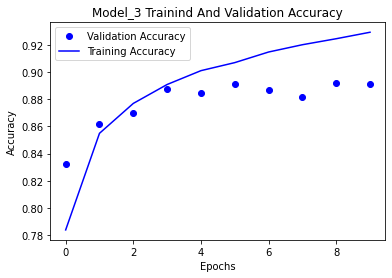

In [ ]:
epochs_three = range(len(history_three.history['accuracy']))
plt.plot(epochs_three, history_three.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_three, history_three.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_3 Trainind And Validation Accuracy")
plt.legend()

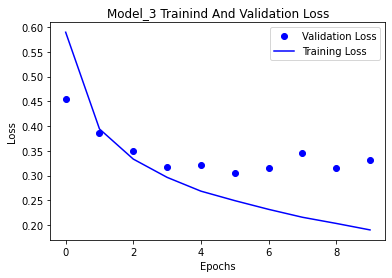

In [ ]:
epochs_three = range(len(history_three.history['accuracy']))
plt.plot(epochs_three, history_three.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_three, history_three.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_3 Trainind And Validation Loss")
plt.legend()

Result:

Adding more convolution and pooling layers decrease overfitting proble